In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 60

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import math
import statistics 


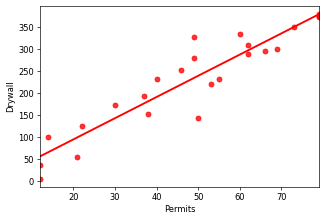

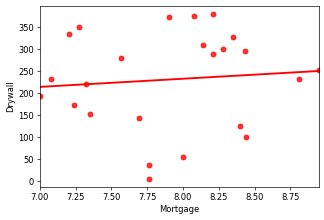

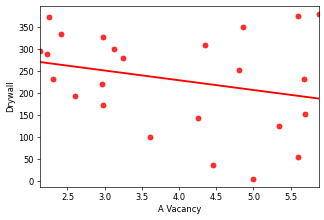

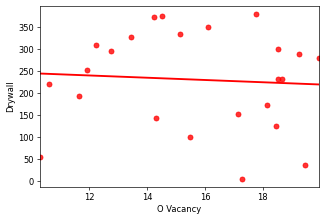

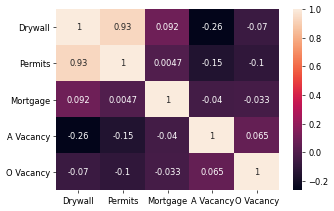

In [2]:
df_17_3 = pd.read_excel("Xr17-03.xlsx")

y_var = df_17_3["Drywall"].values

xnames = ['Permits','Mortgage','A Vacancy','O Vacancy']

for aname in xnames:
    x_var = df_17_3[aname].values
    _ = sns.regplot(x=x_var,y = y_var,data=df_17_3,color ='r',ci=None)
    plt.xlabel(aname)
    plt.ylabel('Drywall')
    plt.show()
    
corr_1=df_17_3.corr()
_ = sns.heatmap(corr_1,annot=True)

In [3]:
y_data = df_17_3["Drywall"]
X_data_arr = np.array([df_17_3["Permits"],df_17_3["Mortgage"],df_17_3["A Vacancy"],df_17_3["O Vacancy"]])
X_data_T = X_data_arr.T
X_data = pd.DataFrame(X_data_T,columns=xnames)
X_data_constant = sm.add_constant(X_data)
olsmod = sm.OLS(y_data,X_data_constant)
result_reg = olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Drywall   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     39.86
Date:                Mon, 31 May 2021   Prob (F-statistic):           5.45e-09
Time:                        00:32:34   Log-Likelihood:                -119.86
No. Observations:                  24   AIC:                             249.7
Df Residuals:                      19   BIC:                             255.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -111.8276    134.343     -0.832      0.4

In [5]:
X

array([[ 1.  , 49.  ,  8.35,  2.98, 13.43],
       [ 1.  , 79.  ,  8.08,  5.6 , 14.51],
       [ 1.  , 79.  ,  7.9 ,  2.25, 14.24],
       [ 1.  , 50.  ,  7.69,  4.26, 14.3 ],
       [ 1.  , 37.  ,  7.  ,  2.6 , 11.64],
       [ 1.  , 53.  ,  7.32,  2.97, 10.61],
       [ 1.  , 22.  ,  8.4 ,  5.35, 18.45],
       [ 1.  , 69.  ,  8.28,  3.13, 18.52],
       [ 1.  , 21.  ,  8.  ,  5.6 , 10.29],
       [ 1.  , 46.  ,  8.95,  4.81, 11.91],
       [ 1.  , 79.  ,  8.21,  5.88, 17.75],
       [ 1.  , 30.  ,  7.24,  2.98, 18.16],
       [ 1.  , 38.  ,  7.35,  5.69, 17.14],
       [ 1.  , 73.  ,  7.27,  4.86, 16.11],
       [ 1.  , 55.  ,  7.08,  5.68, 18.54],
       [ 1.  , 12.  ,  7.76,  4.46, 19.46],
       [ 1.  , 62.  ,  8.21,  2.23, 19.26],
       [ 1.  , 12.  ,  7.76,  5.  , 17.28],
       [ 1.  , 60.  ,  7.2 ,  2.42, 15.15],
       [ 1.  , 49.  ,  7.57,  3.25, 19.94],
       [ 1.  , 14.  ,  8.44,  3.61, 15.47],
       [ 1.  , 66.  ,  8.43,  2.13, 12.75],
       [ 1.  , 62.  ,  8.14,  4.

In [4]:
X = sm.add_constant(X_data_T)
H = np.matmul(X, np.linalg.solve(np.matmul(X.T, X), X.T))
df_17_3['hii'] = np.diagonal(H)
df_17_3_h = pd.DataFrame(df_17_3['hii'])
k = result_reg.df_model
n = len(df_17_3_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df_17_3_h['hii'] > h_level )
print("Influential Observations by hi = \n")
print(df_17_3_h['hii'].loc[filter])

h_level =  0.625
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)
